<a href="https://colab.research.google.com/github/23ME30056/CRACK-DETECTION-USING-CRANET/blob/main/Self_Supervised_Learning_CraNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision
!pip install lightly

   ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 216.1/363.4 MB 75.1 MB/s eta 0:00:02ERROR: Operation cancelled by user
Traceback (most recent call last):
  File 
"/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", 
line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File 
"/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line
67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File 
"/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", 
line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File 
"/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/res
olver.py", line 179, in resolve
    self.factory.preparer.prepare_linked_requirements_more(reqs)
  File 
"/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/prepare.py", 
line 554, in prepare_linked_requiremen

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
source_dirs = ['/content/drive/MyDrive/CRANET research (1)/CRANET research/Dataset/Concrete Crack Images for Classification/Positive', '/content/drive/MyDrive/CRANET research (1)/CRANET research/Dataset/Concrete Crack Images for Classification/Negative']
destination_dir = '/content/drive/MyDrive/CRANET research (1)/CRANET research/Dataset/Concrete Crack Images for Classification/Unlabelled'

In [ ]:
import os

def count_images(folder):
    return sum(
        1 for filename in os.listdir(folder)
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'))
    )

positive_count = count_images(source_dirs[0])
negative_count = count_images(source_dirs[1])

print(f"🟢 Number of positive images: {positive_count}")
print(f"🔴 Number of negative images: {negative_count}")

In [ ]:
# import os
# import shutil
# os.makedirs(destination_dir, exist_ok=True)

# # Counter for renaming files uniquely
# counter = 0

# # Loop through each source folder
# for folder in source_dirs:
#     for filename in os.listdir(folder):
#         src_path = os.path.join(folder, filename)

#         # Skip non-image files (just in case)
#         if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
#             continue

#         # Give a new unique name: crack_ or noncrack_ based on original folder
#         label = 'crack' if folder == source_dirs[0] else 'noncrack'
#         new_filename = f"{label}_{counter:05d}{os.path.splitext(filename)[1]}"
#         dst_path = os.path.join(destination_dir, new_filename)

#         shutil.copy(src_path, dst_path)
#         counter += 1

# print(f"✅ Merged {counter} images into '{destination_dir}/'")

In [ ]:
source_zip = "/content/drive/MyDrive/CRANET research (1)/CRANET research/5y9wdsg2zt-2.zip"

In [ ]:
!unzip -o "/content/drive/MyDrive/CRANET research (1)/CRANET research/5y9wdsg2zt-2.zip" \
-d "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped"

In [ ]:
!ls /content/crack_data

In [ ]:
!apt-get install unrar -y

In [ ]:
source_rar = "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/Concrete Crack Images for Classification.rar"

In [ ]:
!unrar x \
"/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/Concrete Crack Images for Classification.rar" \
"/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/extracted/"


In [5]:
source_dirs = ["/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/extracted/Positive","/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/extracted/Negative"]

In [ ]:
import os
import shutil

# Paths to the extracted folders
positive_dir = source_dirs[0]
negative_dir = source_dirs[1]
destination_dir = "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/unlabelled"

# Make the output directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Labels for renaming
source_dirs = [positive_dir, negative_dir]
labels = {positive_dir: 'crack', negative_dir: 'noncrack'}

# Start copying and renaming files
counter = 0
for folder in source_dirs:
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')):
            src_path = os.path.join(folder, filename)
            ext = os.path.splitext(filename)[1]
            label = labels[folder]
            new_filename = f"{label}_{counter:05d}{ext}"
            dst_path = os.path.join(destination_dir, new_filename)

            shutil.copy(src_path, dst_path)
            counter += 1

print(f"✅ Merged {counter} images into: {destination_dir}")

In [ ]:
# # CBAM attention network
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
# from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Concatenate, multiply, Reshape
# from tensorflow.keras.layers import Add, Lambda, GlobalMaxPooling2D, Activation,MaxPooling2D
# from tensorflow.keras.models import Sequential, Model, load_model

# def channel_attention_layers(input_f, channel, ratio=16):
#     """
#     This channel module contains two main pooling feature, i.e.,
#     max polling and average pooing, this enable the channel module
#     to focus on the attention.
#     """
#     layer_1 = Dense(channel//ratio, activation='relu')
#     layer_2 = Dense(channel)

#     #average pool
#     avg_pooling = GlobalAveragePooling2D()(input_f)
#     avg_pooling = layer_1(avg_pooling)
#     avg_pooling = layer_2(avg_pooling)

#     #max pool feature for more concenetrated channel feature
#     max_pooling = GlobalMaxPooling2D()(input_f)
#     max_pooling = layer_1(max_pooling)
#     max_pooling = layer_2(max_pooling)

#     # adding both the max and average pool in an alignment
#     cbam_feature = Add()([avg_pooling,max_pooling])
#     cbam_feature = Activation('sigmoid')(cbam_feature)
#     return multiply([input_f, cbam_feature])



# def spatial_attention_layers(input_f,kernel_size):
#     avg_pooling = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(input_f)
#     max_pooling = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(input_f)
#     concat = Concatenate(axis=3)([avg_pooling, max_pooling])
#     cbam_feature = Conv2D(filters = 1,kernel_size=kernel_size,strides=1,padding='same',activation='sigmoid',use_bias=False)(concat)
#     return multiply([input_f, cbam_feature])

# def cbam_block1(cbam_f, channel, ratio = 16, kernel_size = 3):

#     """
#     In the paper provided details says that, kernel size = 3,
#     since the kernel in vgg16 is 3;
#     this also depdends on the convolutional kernel size.
#     """
#     cbam_f = channel_attention_layers(cbam_f, channel, ratio)
#     cbam_f = spatial_attention_layers(cbam_f, kernel_size)
#     return cbam_f

In [3]:
from tensorflow.keras.layers import (
    GlobalAveragePooling2D, GlobalMaxPooling2D, Dense, Reshape, Add,
    Activation, Multiply, Concatenate, Conv2D, Lambda
)
import tensorflow.keras.backend as K
import tensorflow as tf

def cbam_block1(input_feature, channel, ratio=8):
    # CHANNEL ATTENTION
    shared_dense_one = Dense(channel // ratio, activation='relu', kernel_initializer='he_normal', use_bias=True)
    shared_dense_two = Dense(channel, kernel_initializer='he_normal', use_bias=True)

    # Avg Pool
    avg_pool = GlobalAveragePooling2D()(input_feature)
    avg_pool = Reshape((1, 1, channel))(avg_pool)
    avg_pool = shared_dense_one(avg_pool)
    avg_pool = shared_dense_two(avg_pool)

    # Max Pool
    max_pool = GlobalMaxPooling2D()(input_feature)
    max_pool = Reshape((1, 1, channel))(max_pool)
    max_pool = shared_dense_one(max_pool)
    max_pool = shared_dense_two(max_pool)

    # Add + sigmoid
    channel_attention = Add()([avg_pool, max_pool])
    channel_attention = Activation('sigmoid')(channel_attention)

    # Apply channel attention
    x = Multiply()([input_feature, channel_attention])

    # SPATIAL ATTENTION
    def compute_avg(x):
        return tf.reduce_mean(x, axis=3, keepdims=True)

    def compute_max(x):
        return tf.reduce_max(x, axis=3, keepdims=True)

    avg_pool_spatial = Lambda(compute_avg, output_shape=lambda s: (s[0], s[1], s[2], 1))(x)
    max_pool_spatial = Lambda(compute_max, output_shape=lambda s: (s[0], s[1], s[2], 1))(x)

    spatial_attention = Concatenate(axis=3)([avg_pool_spatial, max_pool_spatial])
    spatial_attention = Conv2D(1, kernel_size=7, strides=1, padding='same', activation='sigmoid',
                               kernel_initializer='he_normal', use_bias=False)(spatial_attention)

    # Apply spatial attention
    refined_feature = Multiply()([x, spatial_attention])

    return refined_feature


In [4]:
###################
# CNN+CBAM with 6 conv layers
##################
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.models import Model

inputs = Input(shape=(224,224,3), name="img")

x = Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv1-1')(inputs)
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv1-2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2),name='pool1')(x)

x = cbam_block1(x, 32)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv2-1')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv2-2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='pool2')(x)

x = cbam_block1(x, 64)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='Conv3-1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='Conv3-2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2),name='pool3')(x)
x = cbam_block1(x, 128)
x = Flatten(name='flatten')(x)                             ##############################
x = Dense(512, activation='relu', name='Dense1')(x)     # Experiment try to reduce the Dense layers from 1024 to down; See how the classification performance changes;
x = Dense(512, activation='relu', name='Dense2')(x)       ############################
x = Dense(2, activation='softmax', name='output')(x)     # try to manage Softmax and Sigmoid; the binary mask is coming good with sigmoid but softmax is good for compplex cracks segmentation
                   # use sigmoid  for binary classification or softmax for multi-class
cranet_light = Model(inputs = inputs, outputs = x, name="cranet_light")

In [ ]:

cranet_light.summary()

Model: "cranet_light"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)    │ (None, 224, 224,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1-1 (Conv2D)    │ (None, 224, 224,  │        896 │ img[0][0]         │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1-2 (Conv2D)    │ (None, 224, 224,  │      9,248 │ Conv1-1[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 112, 112,  │          0 │ Conv1-2[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ pool1[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ pool1[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 1, 32)  │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 1, 1, 32)  │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1, 1, 4)   │        132 │ reshape[0][0],    │
│                     │                   │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1, 1, 32)  │        160 │ dense[0][0],      │
│                     │                   │            │ dense[1][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 1, 1, 32)  │          0 │ dense_1[0][0],    │
│                     │                   │            │ dense_1[1][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1, 1, 32)  │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 112, 112,  │          0 │ pool1[0][0],      │
│                     │ 32)               │            │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 112, 112,  │          0 │ multiply[0][0]    │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_5 (Lambda)   │ (None, 112, 112,  │          0 │ multiply[0][0]    │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 112, 112,  │          0 │ lambda_4[0][0],   │
│ (Concatenate)       │ 2)                │            │ lambda_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │         98 │ concatenate[0][0] │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 51,937,348 (198.13 MB)

 Trainable params: 51,937,348 (198.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
cranet_light.compile(optimizer = 'SGD' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])   #change the loss function based on your knowledge to perfrom binary crack classification
cranet_light.summary()
# history4 = modelCBAM.fit(x_train,y_train,epochs = 15 , validation_data=(x_val, y_val), batch_size=64)
# modelCBAM.save('1_41_finetune_cbam.h5')


NameError: name 'cranet_light' is not defined

In [ ]:
!pip install -U tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 w

# **Implementing Simclr**


In [ ]:
import tensorflow as tf

def random_resized_crop(image, target_size=(224, 224), scale=(0.7, 1.0), ratio=(0.9, 1.1)):
    # Crop config: reasonable area, almost-square aspect
    bbox = tf.constant([[[0.0, 0.0, 1.0, 1.0]]])
    crop_window = tf.image.sample_distorted_bounding_box(
        tf.shape(image),
        bounding_boxes=bbox,
        area_range=scale,
        aspect_ratio_range=ratio,
        use_image_if_no_bounding_boxes=True
    )
    cropped = tf.slice(image, crop_window.begin, crop_window.size)
    resized = tf.image.resize(cropped, target_size)
    return resized



In [1]:
def get_simclr_augmenter():
    def crop_layer(x):
        return tf.map_fn(lambda img: random_resized_crop(img), x)

    return tf.keras.Sequential([
        tf.keras.layers.RandomCrop(224,224),
        tf.keras.layers.Resizing(224, 224),
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.15),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.RandomContrast(0.3),
        # tf.keras.layers.Rescaling(1.0 / 255),
    ], name="simclr_crack_augmenter")


In [ ]:
import os

unlabelled_dir = "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/unlabelled"

num_images = len([
    fname for fname in os.listdir(unlabelled_dir)
    if fname.lower().endswith((".jpg", ".jpeg", ".png"))
])

print(f"🖼️ Total images in 'unlabelled/': {num_images}")

🖼️ Total images in 'unlabelled/': 22776


In [ ]:
num_crack_images = len([
    f for f in os.listdir(unlabelled_dir)
    if f.lower().startswith("crack") and f.lower().endswith((".jpg", ".jpeg", ".png"))
])

print(f"🟢 Number of 'crack' images: {num_crack_images}")


🟢 Number of 'crack' images: 20000


In [6]:
unlabelled_dir = "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/unlabelled"

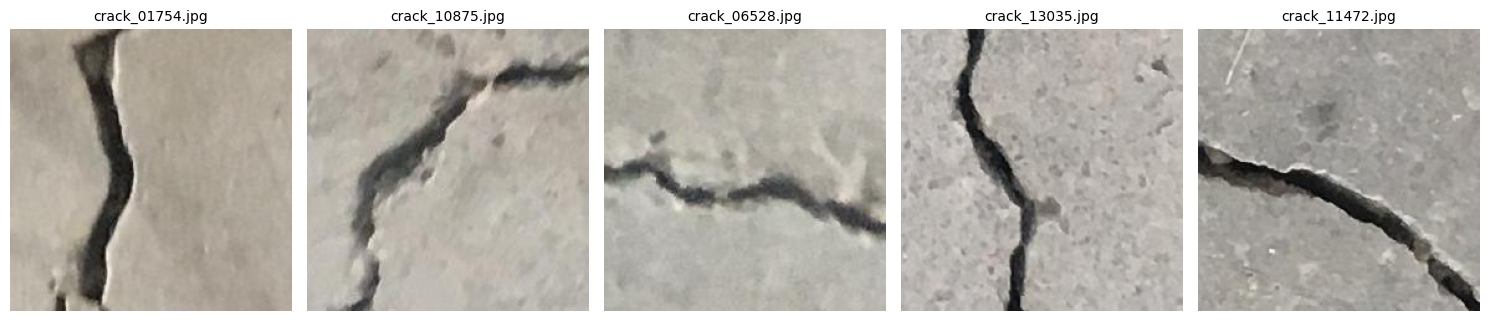

In [7]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Path to your unlabelled image directory
folder = unlabelled_dir

# Get all 'crack' image paths with correct extensions
crack_images = [
    f for f in os.listdir(folder)
    if f.lower().startswith("crack") and f.lower().endswith((".jpg", ".jpeg", ".png"))
]

# Shuffle and pick a few
random.shuffle(crack_images)
num_to_display = min(5, len(crack_images))  # Show up to 5
selected_images = crack_images[:num_to_display]

# Plot the selected images with actual file names
plt.figure(figsize=(15, 5))
for i, filename in enumerate(selected_images):
    img_path = os.path.join(folder, filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    plt.subplot(1, num_to_display, i + 1)
    plt.imshow(img)
    plt.title(filename, fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()


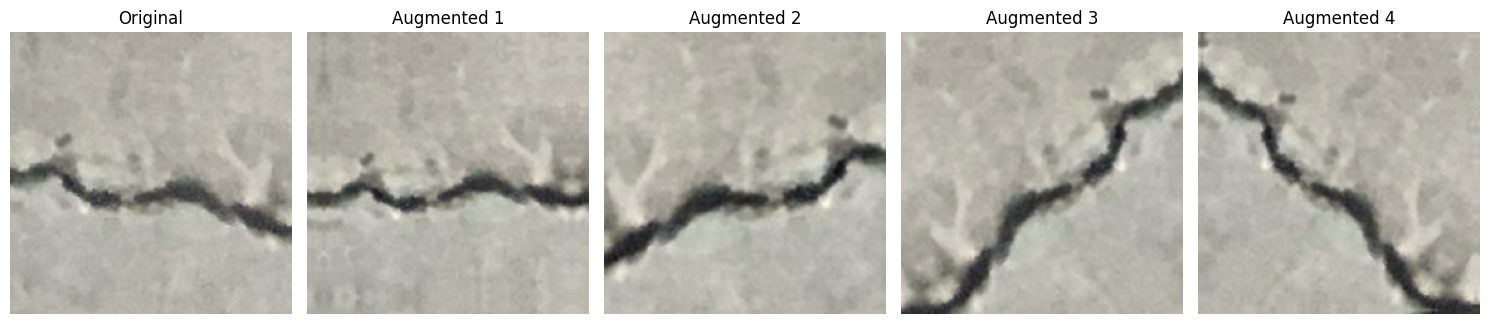

In [8]:
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/CRANET research (1)/CRANET research/unzipped/unlabelled/crack_06528.jpg"  # adjust filename as needed
img_raw = tf.io.read_file(image_path)
img = tf.image.decode_image(img_raw, channels=3)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, [224, 224])

# 3) Instantiate the augmenter
augmenter = get_simclr_augmenter()

# 4) Generate a few augmented “views”
views = [augmenter(tf.expand_dims(img, 0))[0] for _ in range(4)]

# 5) Plot original + augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes[0].imshow(img.numpy())
axes[0].set_title("Original")
axes[0].axis("off")

for i, view in enumerate(views, start=1):
    axes[i].imshow(view.numpy())
    axes[i].set_title(f"Augmented {i}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# * *Step 2*: **Load Your Unlabelled Dataset and Apply the Augmentations**

In [9]:
import tensorflow as tf
import os

def load_unlabelled_dataset(unlabelled_dir, batch_size=128):
    # List all image files
    filepaths = [os.path.join(unlabelled_dir, fname)
                 for fname in os.listdir(unlabelled_dir)
                 if fname.lower().endswith(('.jpg', '.jpeg', '.png'))]

    dataset = tf.data.Dataset.from_tensor_slices(filepaths)

    # Load and decode images (inside function!)
    def load_image(path):
        img_bytes = tf.io.read_file(path)

        # Get file extension
        ext = tf.strings.split(path, ".")[-1]
        ext = tf.strings.lower(ext)

        def decode_jpeg(): return tf.image.decode_jpeg(img_bytes, channels=3)
        def decode_png():  return tf.image.decode_png(img_bytes, channels=3)

        # Choose decoder based on extension
        img = tf.cond(
            tf.logical_or(tf.equal(ext, "jpg"), tf.equal(ext, "jpeg")),
            decode_jpeg,
            decode_png
        )

        # Normalize and resize
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.image.resize(img, [224, 224])
        return img

    # ✅ Make sure augmenter is inside function too
    augmenter = get_simclr_augmenter()

    # Apply two augmentations to each image
    def apply_augmentations(img_path):
        img = load_image(img_path)
        img.set_shape([224, 224, 3])
        view1 = augmenter(img)
        view2 = augmenter(img)
        return view1, view2

    # Build the pipeline
    dataset = dataset.shuffle(10000)
    dataset = dataset.map(apply_augmentations, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return dataset  # ✅ Now it returns correctly!



In [12]:
def get_cranet_encoder():
    return tf.keras.Model(
        inputs=cranet_light.input,
        outputs=cranet_light.get_layer("Dense1").output,
        name="cranet_encoder"
    )

In [ ]:
print(cranet_light.input)  # should print a KerasTensor
print(cranet_light.get_layer("Dense1").output)

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=img>
<KerasTensor shape=(None, 512), dtype=float32, sparse=False, name=keras_tensor_58>


In [13]:
cranet_light.summary()

Model: "cranet_light"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)    │ (None, 224, 224,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1-1 (Conv2D)    │ (None, 224, 224,  │        896 │ img[0][0]         │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1-2 (Conv2D)    │ (None, 224, 224,  │      9,248 │ Conv1-1[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 112, 112,  │          0 │ Conv1-2[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ pool1[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ pool1[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 1, 32)  │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 1, 1, 32)  │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1, 1, 4)   │        132 │ reshape[0][0],    │
│                     │                   │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1, 1, 32)  │        160 │ dense[0][0],      │
│                     │                   │            │ dense[1][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 1, 1, 32)  │          0 │ dense_1[0][0],    │
│                     │                   │            │ dense_1[1][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1, 1, 32)  │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 112, 112,  │          0 │ pool1[0][0],      │
│                     │ 32)               │            │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 112, 112,  │          0 │ multiply[0][0]    │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 112, 112,  │          0 │ multiply[0][0]    │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 112, 112,  │          0 │ lambda[0][0],     │
│ (Concatenate)       │ 2)                │            │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │         98 │ concatenate[0][0] │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 51,937,348 (198.13 MB)

 Trainable params: 51,937,348 (198.13 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
encoder = get_cranet_encoder()
encoder.summary()

Model: "cranet_encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)    │ (None, 224, 224,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1-1 (Conv2D)    │ (None, 224, 224,  │        896 │ img[0][0]         │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1-2 (Conv2D)    │ (None, 224, 224,  │      9,248 │ Conv1-1[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 112, 112,  │          0 │ Conv1-2[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ pool1[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ pool1[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 1, 32)  │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 1, 1, 32)  │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1, 1, 4)   │        132 │ reshape[0][0],    │
│                     │                   │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1, 1, 32)  │        160 │ dense[0][0],      │
│                     │                   │            │ dense[1][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 1, 1, 32)  │          0 │ dense_1[0][0],    │
│                     │                   │            │ dense_1[1][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1, 1, 32)  │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 112, 112,  │          0 │ pool1[0][0],      │
│                     │ 32)               │            │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 112, 112,  │          0 │ multiply[0][0]    │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 112, 112,  │          0 │ multiply[0][0]    │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 112, 112,  │          0 │ lambda[0][0],     │
│ (Concatenate)       │ 2)                │            │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │         98 │ concatenate[0][0] │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 51,673,666 (197.12 MB)

 Trainable params: 51,673,666 (197.12 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
def build_simclr_model(encoder, projection_dim=128):
    inputs = tf.keras.Input(shape=(224, 224, 3))

    features = encoder(inputs)  # From cranet encoder
    x = tf.keras.layers.Dense(512, activation='relu')(features)
    outputs = tf.keras.layers.Dense(projection_dim)(x)  # No activation

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="simclr_model")
    return model

In [16]:
simclr_model = build_simclr_model(encoder)
simclr_model.summary()

Model: "simclr_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cranet_encoder (Functional)     │ (None, 512)            │    51,673,666 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        65,664 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,001,986 (198.37 MB)

 Trainable params: 52,001,986 (198.37 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
import tensorflow as tf

def nt_xent_loss(z_i, z_j, temperature=0.5):
    """
    SimCLR NT-Xent Loss for one batch of embeddings
    z_i: Tensor (batch_size, projection_dim)
    z_j: Tensor (batch_size, projection_dim)
    """
    batch_size = tf.shape(z_i)[0]
    z = tf.concat([z_i, z_j], axis=0)  # shape: (2N, D)

    # Normalize embeddings
    z = tf.math.l2_normalize(z, axis=1)

    # Cosine similarity matrix: sim(i,j)
    sim_matrix = tf.matmul(z, z, transpose_b=True)  # shape: (2N, 2N)

    # Scale by temperature
    sim_matrix = sim_matrix / temperature

    # Create mask to filter out similarity with itself
    mask = tf.eye(2 * batch_size)
    sim_matrix = sim_matrix * (1 - mask) - 1e9 * mask  # set diagonal to -inf

    # Positive pair indices
    positives = tf.range(batch_size)
    positive_indices = positives + batch_size

    labels = tf.concat([positive_indices, positives], axis=0)

    # Cross entropy loss
    loss = tf.keras.losses.sparse_categorical_crossentropy(
        labels, sim_matrix, from_logits=True
    )

    return tf.reduce_mean(loss)


In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [19]:
def train_simclr(model, dataset, optimizer, epochs=20, temperature=0.5):
    for epoch in range(1, epochs + 1):
        total_loss = 0.0
        num_batches = 0
  # view 1 and view 2 are 2 augmentations of same image
        for step, (view1, view2) in enumerate(dataset):
            with tf.GradientTape() as tape:
                z1 = model(view1, training=True)
                z2 = model(view2, training=True)
                loss = nt_xent_loss(z1, z2, temperature)

            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            total_loss += loss
            num_batches += 1

            if step % 20 == 0:
                print(f"Step {step:04d} — Loss: {loss:.4f}")

        avg_loss = total_loss / num_batches
        print(f"\n🔥 Epoch {epoch}/{epochs} — Avg Loss: {avg_loss:.4f}\n")

In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [21]:
train_ds = load_unlabelled_dataset(unlabelled_dir, batch_size=128)

In [22]:
print("dataset :",type(train_ds))

dataset : <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
train_simclr(simclr_model, train_ds, optimizer, epochs=10)


Step 0000 — Loss: 5.5359
Step 0020 — Loss: 5.4084
Step 0040 — Loss: 5.5413
Step 0060 — Loss: 5.5413
Step 0080 — Loss: 5.5413
Step 0100 — Loss: 5.5413


In [ ]:
!nvidia-smi